In [4]:
import pandas as pd
from collections import Counter
import ast
import numpy as np
import matplotlib.pyplot as plt
import datetime
# from skimage.io import imread
import os
import statistics
from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier

In [5]:
train_data = pd.read_csv('updated_train_data.csv')

In [6]:
# One-hot encode the categorical columns
train_data = pd.get_dummies(train_data, columns=['Sex'])
train_data = pd.get_dummies(train_data, columns=['Frontal/Lateral'])
train_data = pd.get_dummies(train_data, columns=['AP/PA'])

In [9]:
train_data = train_data.dropna(subset=['Pleural Effusion'])
X = train_data.drop(['Pleural Effusion', 'Path'],  axis=1)  # assuming all other columns are features
y = train_data['Pleural Effusion']

In [12]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Assuming you've already loaded and preprocessed your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

# Initialize XGBoost classifier
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model
model.fit(X_train, y_train_encoded)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred)


/Users/gabizhelyazkova/anaconda3/envs/Base/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [22:42:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [13]:
accuracy

0.8435842258032229

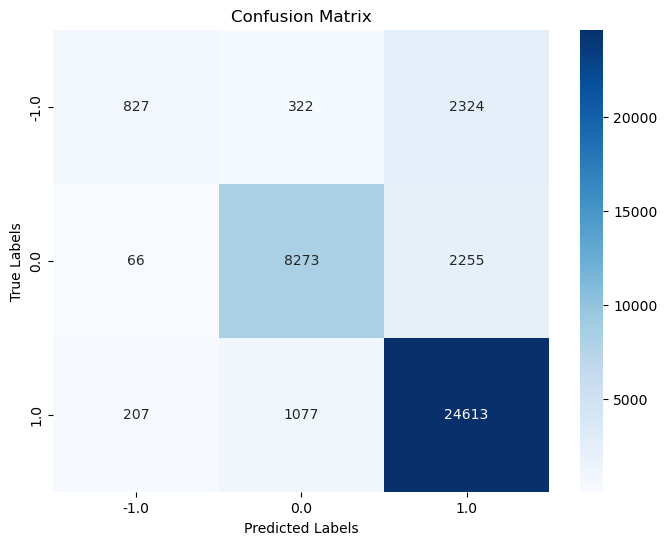

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test_encoded, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()